<a href="https://colab.research.google.com/github/techvarshat/skillnew1/blob/main/huh_ML_DEMO_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TASK 1 : OVERVIEW & IMPORTING LIBRARIES

## Predictive Modeling for Early Breast Cancer Detection Using Logistic Regression


Breast cancer is a major global health threat, and early detection significantly improves survival rates and treatment outcomes. This project uses logistic regression on cell measurement data to predict whether a tumor is malignant or benign, providing a faster and non-invasive diagnostic support tool. The workflow includes data preprocessing, feature scaling, model training, and evaluation using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. The ultimate goal is to build a highly accurate, interpretable, and deployment-ready model that can assist healthcare professionals in early and reliable breast cancer detection.


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns

##TASK 2 : LOADING THE DATA


In [ ]:

# Load the data
df = pd.read_csv('data.csv', index_col = 0)

if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Move 'diagnosis' column to the end of the DataFrame
if 'diagnosis' in df.columns:
    cols = [col for col in df.columns if col != 'diagnosis']
    cols.append('diagnosis')
    df = df[cols]

print("DataFrame head after reordering 'diagnosis' column:")
display(df.head())
print("Columns after reordering:")
print(df.columns.tolist())

DataFrame head after reordering 'diagnosis' column:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


Columns after reordering:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


In [ ]:
df.size

17639

##TASK 3 : DATA-INFO & STATISTICAL OVERVIEW



In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se           

In [ ]:
# Statistical description of the dataframe
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500




---

### 📊 Inference from `df.describe()`

* The dataset contains 30 numerical feature columns related to tumor characteristics such as radius, texture, perimeter, area, smoothness, etc.
* There is a **large variation in scale** between features (e.g., `area_mean` values are in hundreds while `smoothness_mean` values are below 1). This indicates that **feature scaling is necessary** before model training.
* Some features show **high standard deviation**, especially area and perimeter-related variables, suggesting strong variability in tumor sizes across samples.
* For several features, the **mean and median values differ**, indicating slight skewness in the data distribution.
* No missing values are reflected in the count column, meaning the dataset is complete and suitable for modeling without imputation.

---



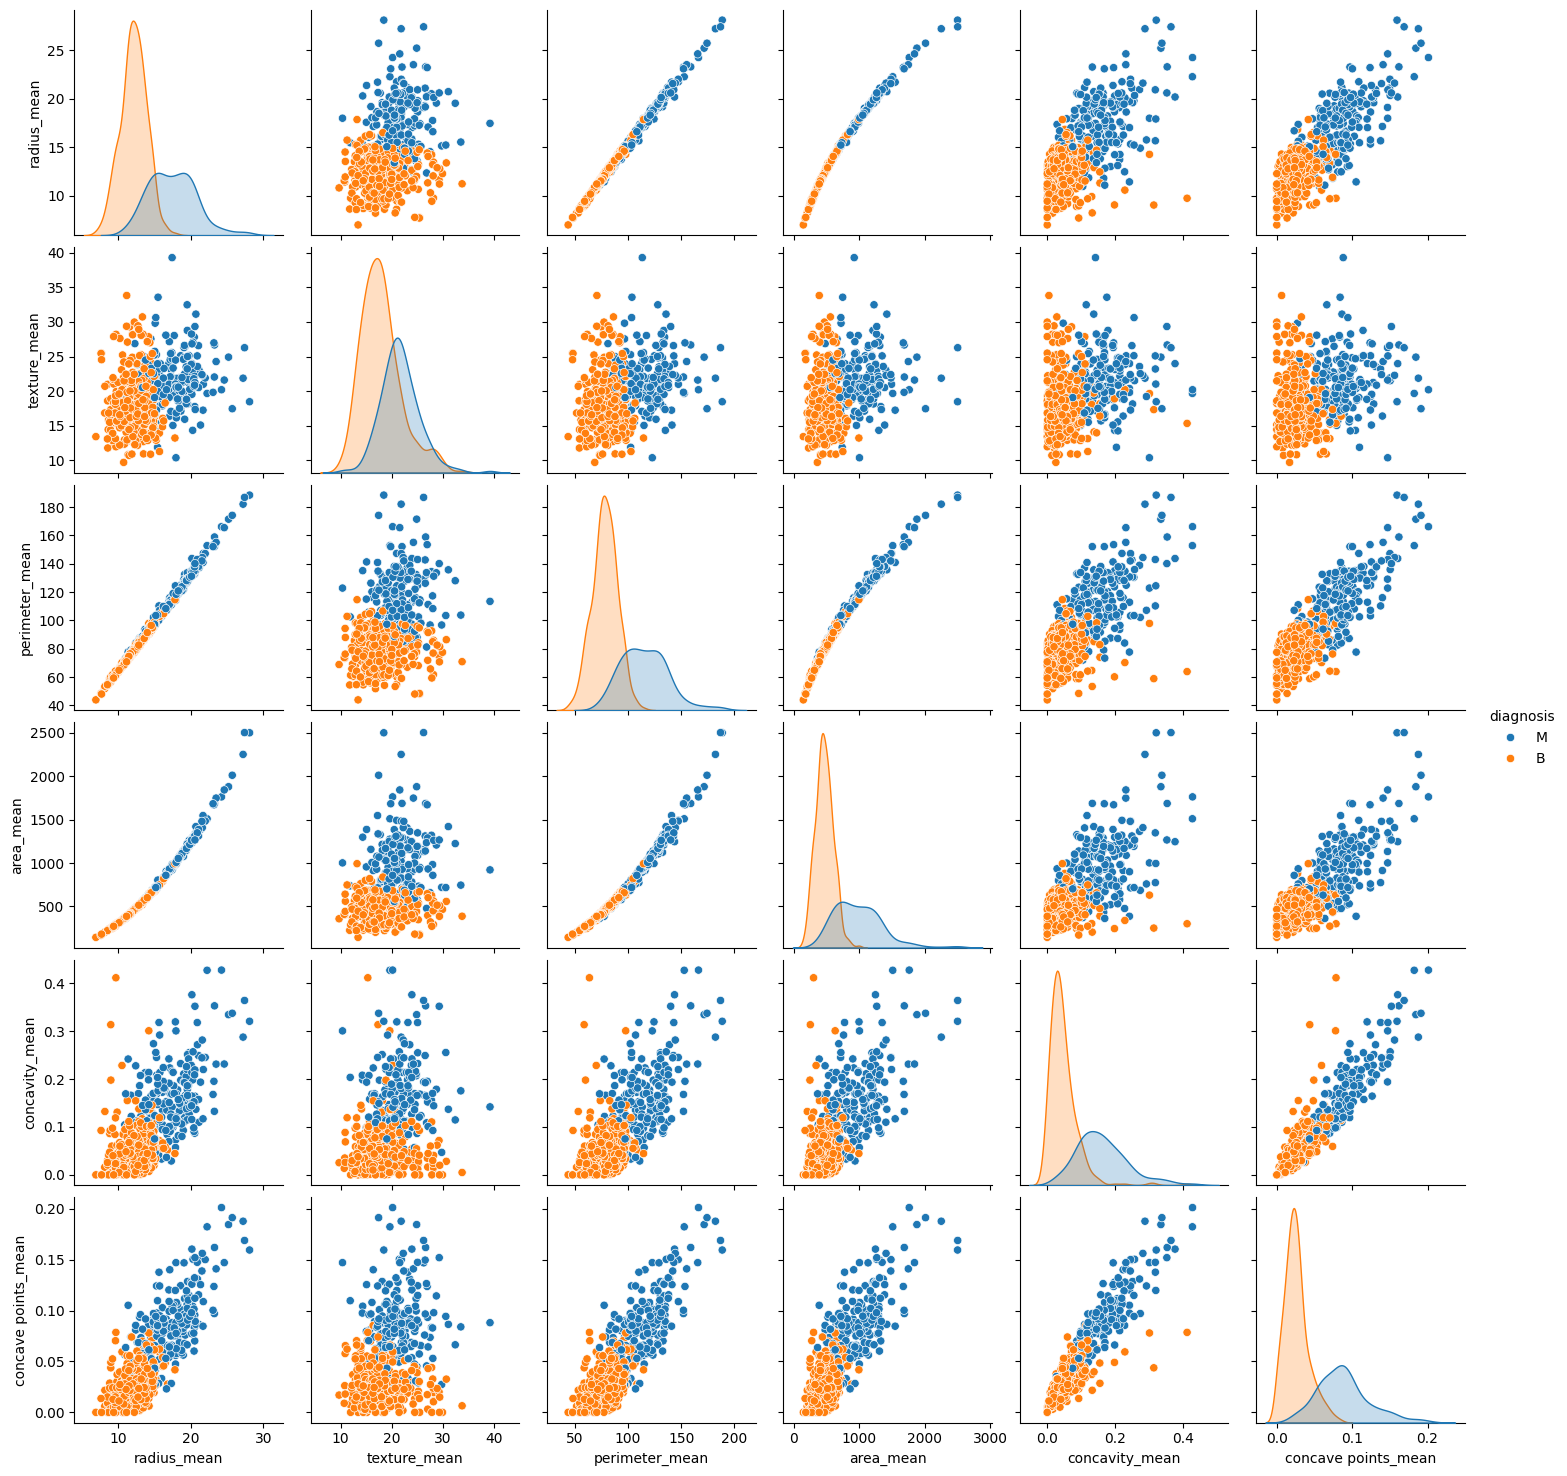

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important features + target
selected_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'concave points_mean',
    'diagnosis'
]

pair_df = df[selected_features]

sns.pairplot(pair_df, hue='diagnosis', diag_kind='kde')
plt.show()


The pair plot shows strong class separation across size and shape-related features. Radius, perimeter, and area are highly correlated and show clear separation between malignant and benign tumors. Concavity-related features also show distinct clustering. This suggests the dataset is nearly linearly separable, which explains the strong performance of logistic regression.

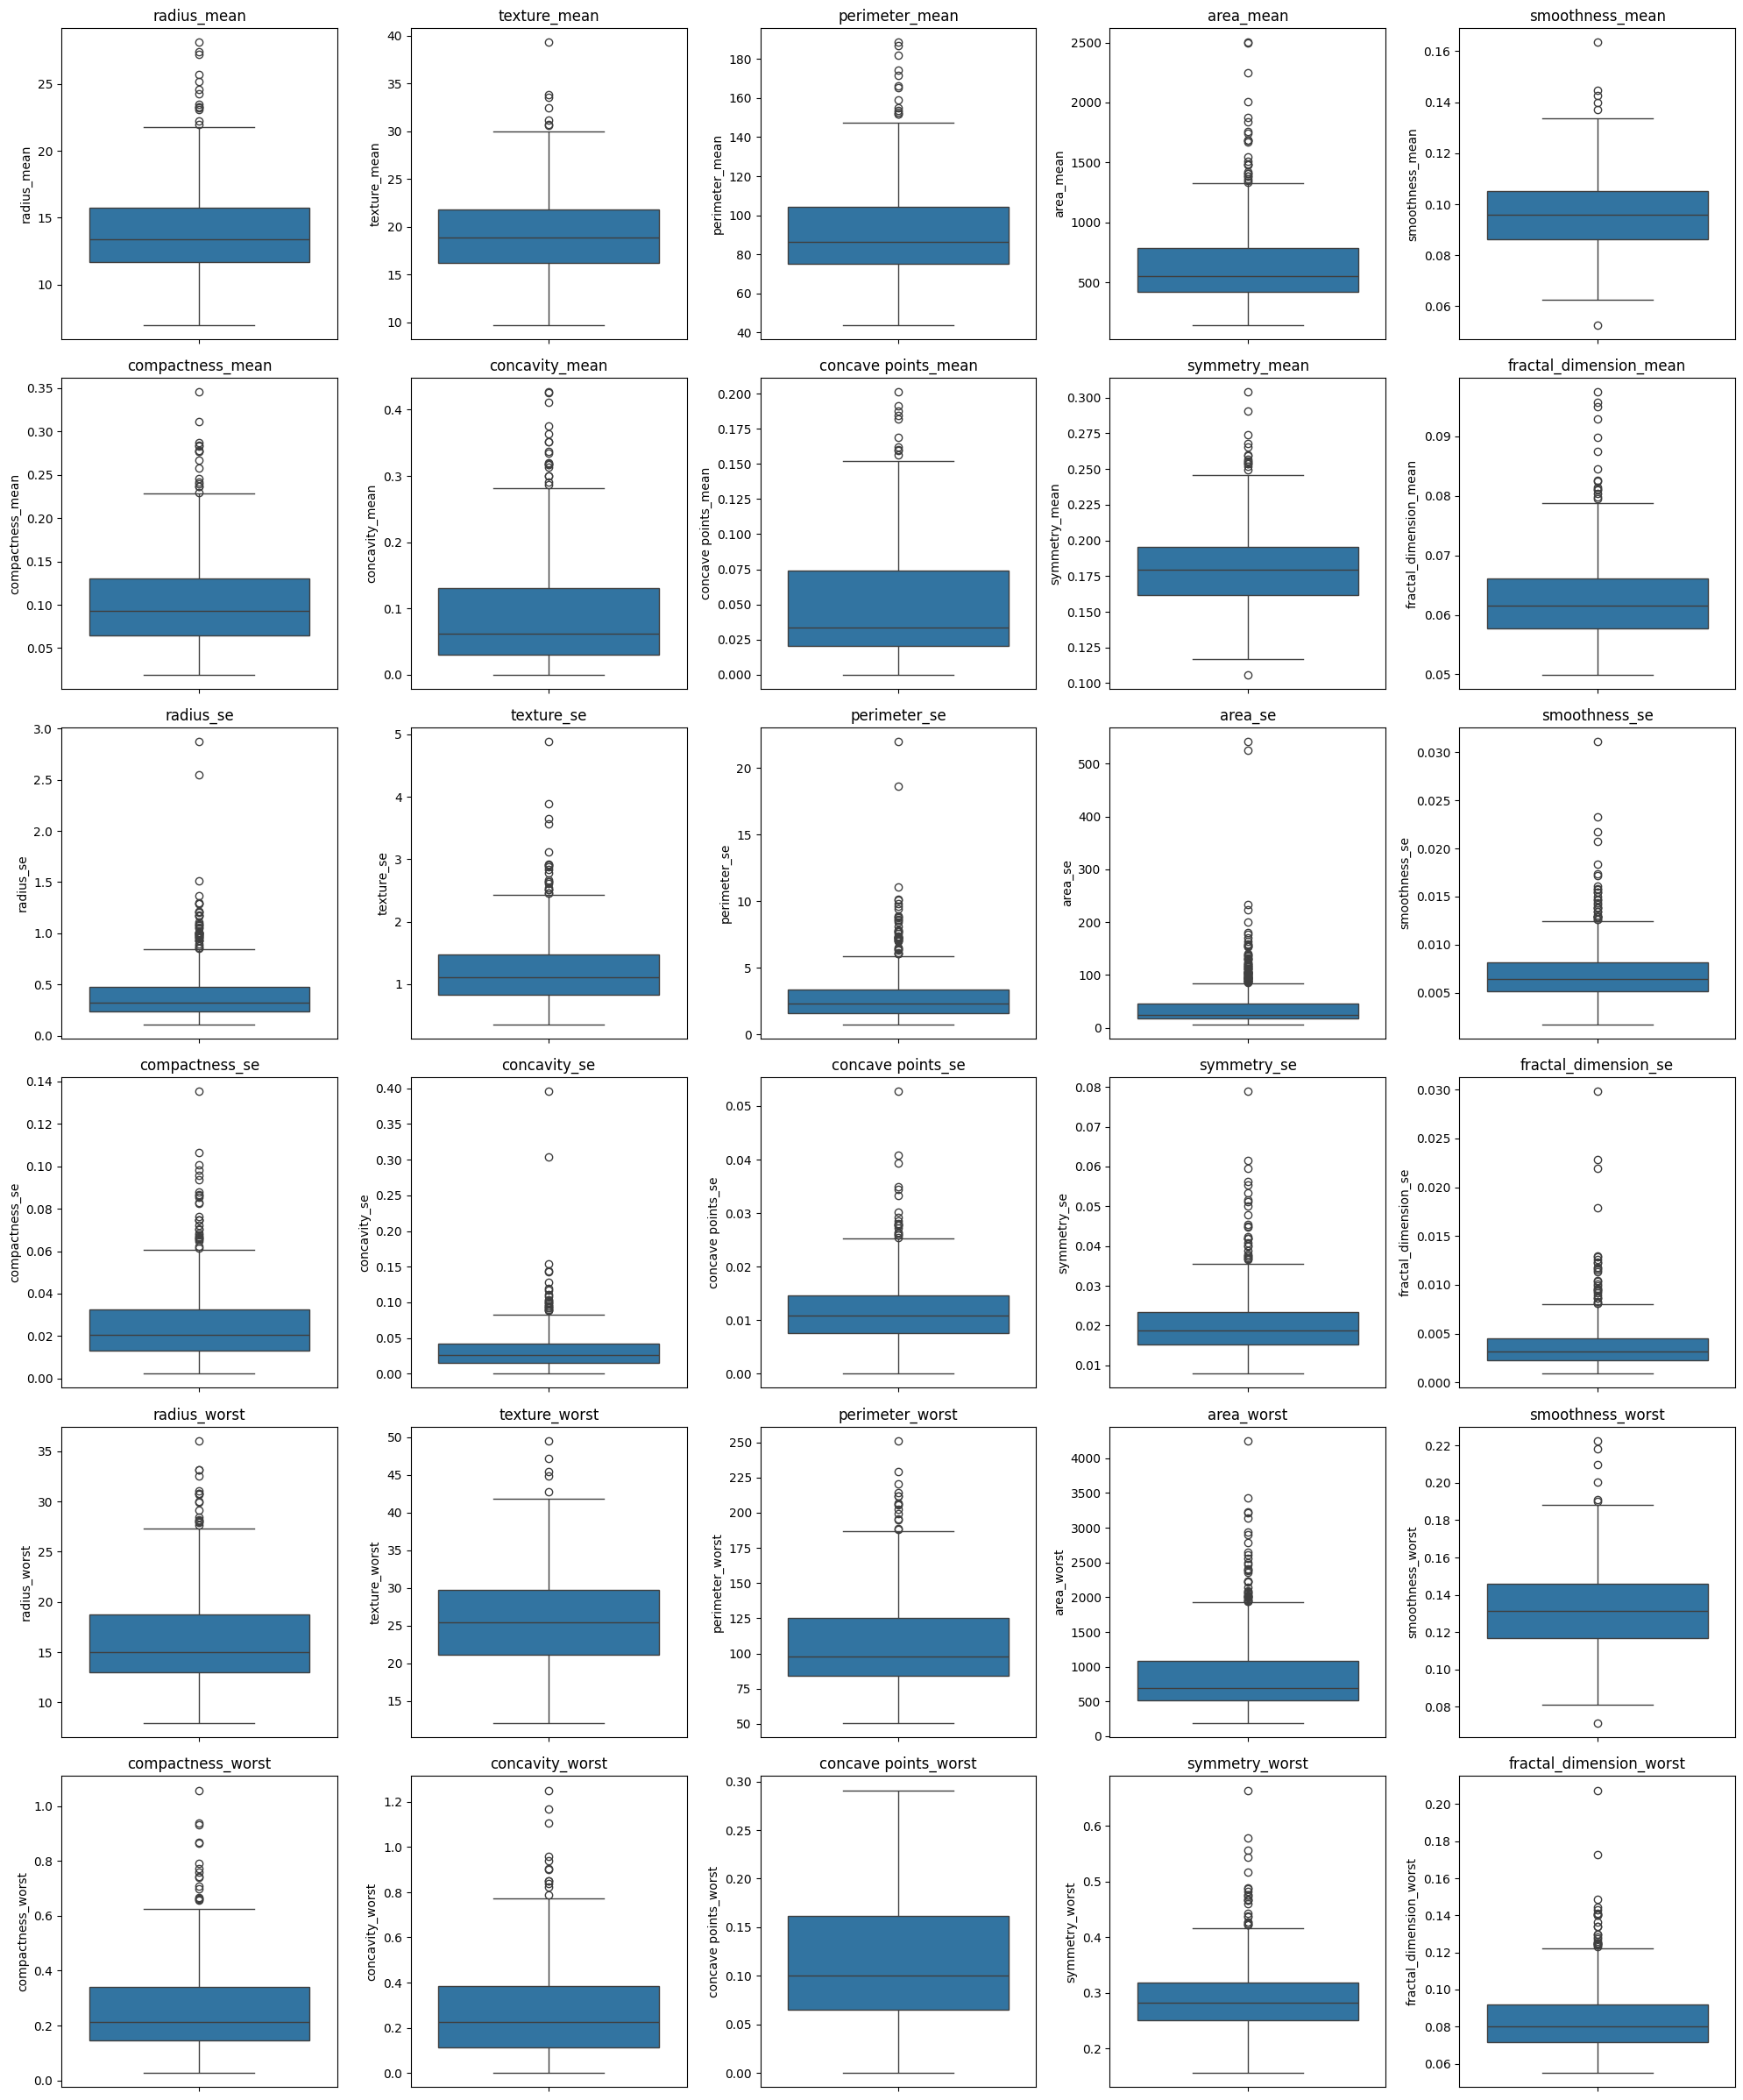

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features only
numeric_df = df.select_dtypes(include=['float64'])

# Set grid size
cols = 5   # number of columns in grid
rows = (len(numeric_df.columns) // cols) + 1

plt.figure(figsize=(20, 4 * rows))

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=numeric_df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()


The boxplots were used to analyze distribution, detect outliers, and observe scale differences among features. Significant scale variation justified feature scaling before applying logistic regression.

##TASK 4 : REMOVING NULL AND UNWANTED VALUES

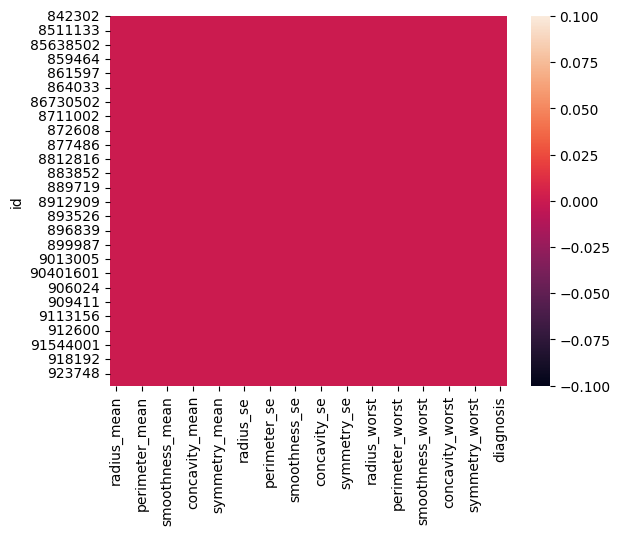

In [ ]:
# To check nan vlaues of the data
sns.heatmap(df.isnull());

### Insight
The dataframe contains no missing values

In [ ]:

# drop irrelevant column(id)
df = df.reset_index() # reseting id
df = df.drop(columns = ['id'], errors='ignore')

In [ ]:
# Confirming the output
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


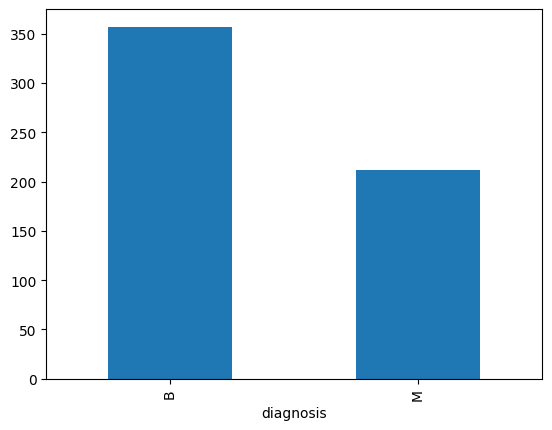

In [ ]:
# To confirm the conversion
df['diagnosis'].value_counts().plot(kind = 'bar');

## TASK 5 : Train Test Split & NORMALIZATION

> Add blockquote



In [ ]:
# Convert the 'diagnosis' column to binary (1 for 'M', 0 for 'B')
df['diagnosis'] = df['diagnosis'].apply(lambda value: 1 if value == 'M' else 0)

# Defining predictors and target variables
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = 1)

In [ ]:

# Split the data using train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Converting the resulting sets to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index= X_test.index ,columns=X_test.columns)

In [ ]:
# Confirming the data structure
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(455, 30)
(114, 30)


In [ ]:
#confirming the shapes are consist
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


In [ ]:
# confirming no missng values
print(X_test_scaled.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


##TASK 6 : Training the model

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
# Create the model
logr = LogisticRegression()

In [ ]:

#Train the model on training data
logr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:

# Predict the target variable based on the train and test
y_pred_train = logr.predict(X_train_scaled)
y_pred_test = logr.predict(X_test_scaled)

In [ ]:
# Evaluation of the model usinf accuracy score
from sklearn.metrics import accuracy_score

# Calculate accuracy for training and testing
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

Training Accuracy: 0.97
Test Accuracy: 0.98


The model achieved an impressive training accuracy of 97% and a test accuracy of 98%, indicating strong performance and effective generalization to unseen data. This suggests that the logistic regression model is well-trained and capable of accurately predicting whether a cell is malignant or not, with minimal overfitting.

##TASK 7 : CONFUSION MATRIX

In [ ]:

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:\n", cm_train)
print("Test Confusion Matrix:\n", cm_test)


Training Confusion Matrix:
 [[285   1]
 [ 13 156]]
Test Confusion Matrix:
 [[71  0]
 [ 2 41]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

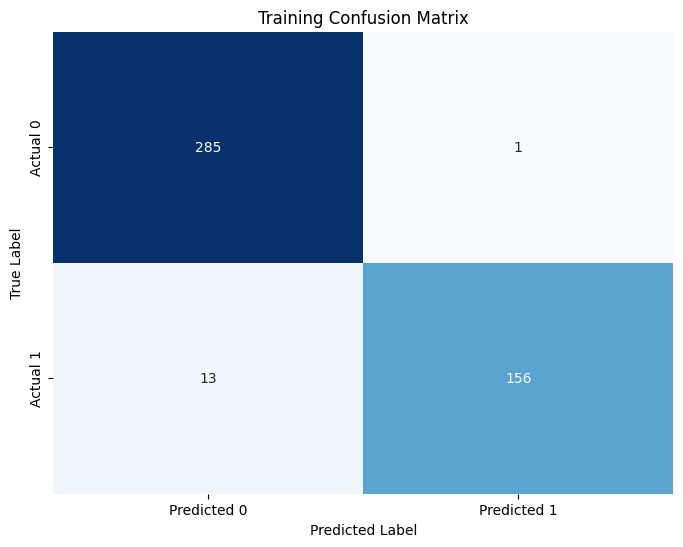

In [ ]:

# Visualize Training Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

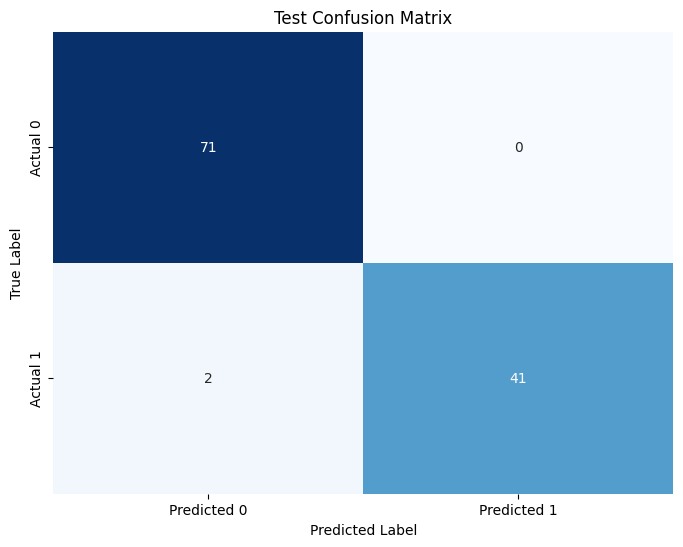

In [ ]:

# Visualize Test Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The training confusion matrix shows 285 true negatives, 1 false positive, 13 false negatives, and 156 true positives, indicating the model performs well but slightly misclassifies a few cases. The test confusion matrix reveals 71 true negatives, 0 false positives, 2 false negatives, and 41 true positives, demonstrating excellent performance with minimal errors on the test data, especially with no false positives.

##TASK 8: CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

print("Training Classification Report:\n", report_train)
print("Test Classification Report:\n", report_test)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       286
           1       0.99      0.92      0.96       169

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455

Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The classification reports show that the model performs excellently, with high precision and recall for both benign (Class 0) and malignant (Class 1) classes. The model achieves 97% accuracy on the training set and 98% accuracy on the test set, indicating strong generalization to new data.

##TASK 9: ROC CURVE

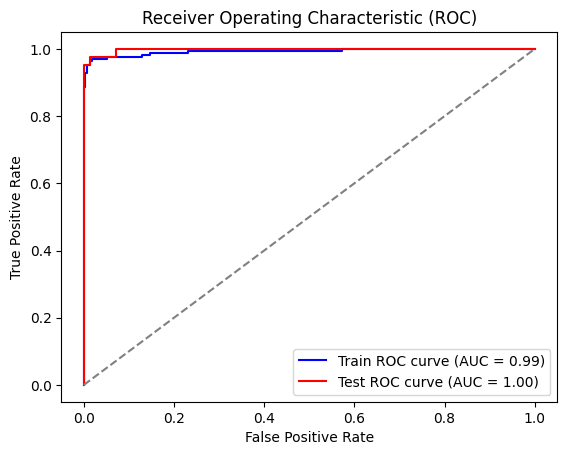

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, logr.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, logr.predict_proba(X_test_scaled)[:, 1])

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Insights
Training AUC of 0.99 and test AUC of 1.00 suggest that your model is highly effective at distinguishing between the classes, with very strong performance on both the training and test datasets.

### Optimal Decision Threshold Calculation

While a default threshold of 0.5 is used, we can calculate an optimal threshold by analyzing the ROC curve. A common approach is to find the threshold that maximizes the Youden's J statistic (sensitivity + specificity - 1).

In [ ]:
from sklearn.metrics import classification_report

# Get probabilities
y_prob = logr.predict_proba(X_test_scaled)[:, 1]

# Threshold 0.5
y_pred_05 = (y_prob >= 0.5).astype(int)
print("Results for Threshold = 0.5")
print(classification_report(y_test, y_pred_05))

# Threshold 0.60
y_pred_060 = (y_prob >= 0.60).astype(int)
print("Results for Threshold = 0.60")
print(classification_report(y_test, y_pred_060))


Results for Threshold = 0.5
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Results for Threshold = 0.60
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



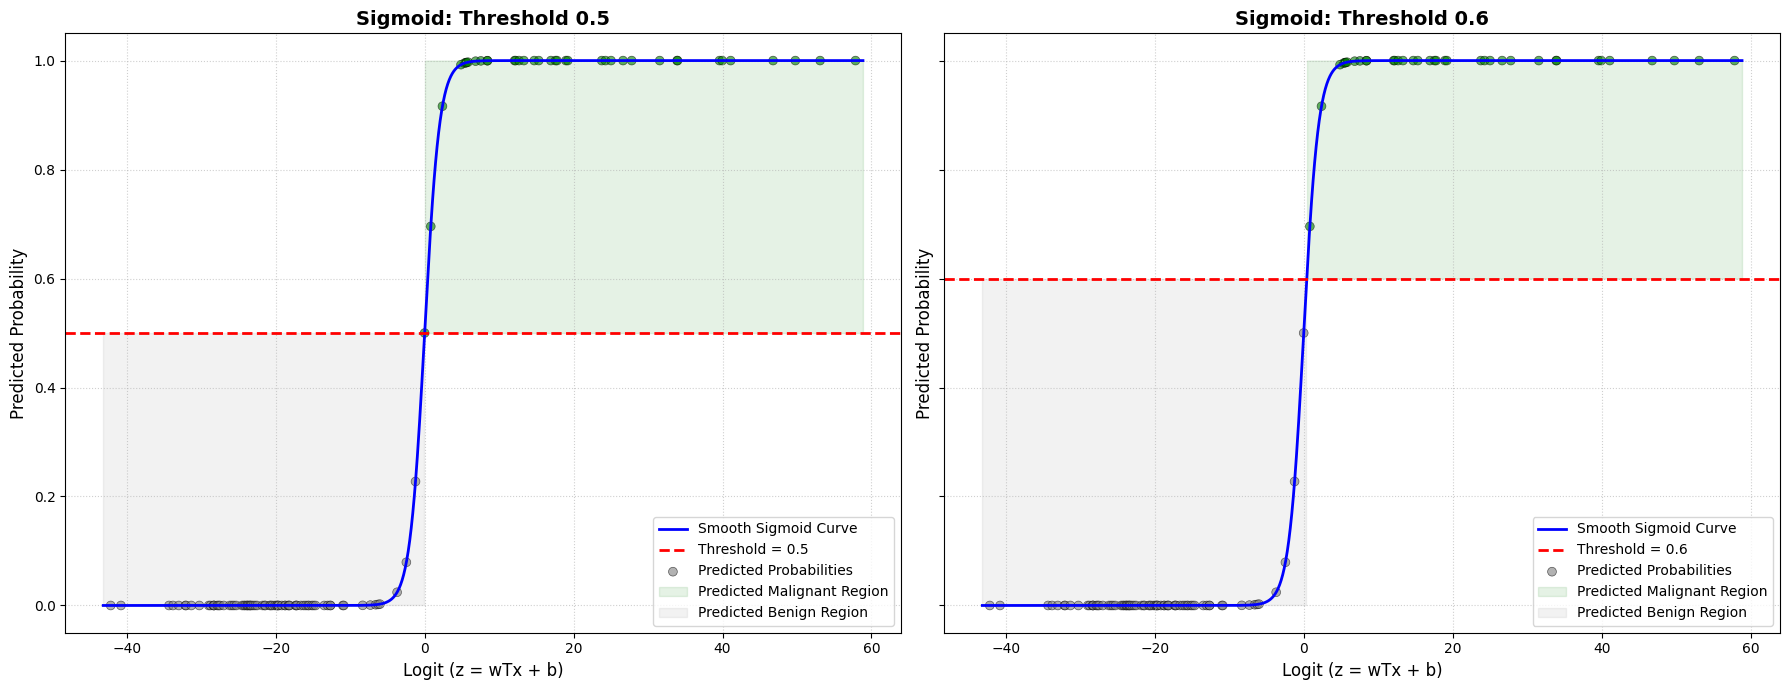

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
import warnings # Import the warnings module

# Suppress specific UserWarning from sklearn about feature names mismatch
warnings.filterwarnings('ignore', category=UserWarning)

# Calculate Logits (z-scores) from your existing 'logr' model and 'X_test_scaled'
z = logr.decision_function(X_test_scaled)

# Sort values so the sigmoid curve plots smoothly
sorted_indices = np.argsort(z.flatten())
z_sorted = z.flatten()[sorted_indices]
y_pred_proba_test_sorted = logr.predict_proba(X_test_scaled)[:, 1][sorted_indices]

# Calculate AUC for the ROC plots (still needed for fpr, tpr, thresholds even if not plotted)
roc_auc = auc(fpr, tpr)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create a denser range for a very smooth sigmoid curve plot
z_plot_range = np.linspace(z_sorted.min() - 1, z_sorted.max() + 1, 1000)

# --- Plotting Functions ---
def plot_sigmoid_threshold(ax, threshold, z_data_points, prob_data_points, z_smooth_range):
    # Plot Sigmoid Curve (very smooth)
    ax.plot(z_smooth_range, sigmoid(z_smooth_range), color='blue', linewidth=2, label='Smooth Sigmoid Curve')

    # Plot Threshold Line
    ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

    # Color actual predicted points based on prediction
    colors = ['green' if p >= threshold else 'gray' for p in prob_data_points]
    ax.scatter(z_data_points, prob_data_points, color=colors, alpha=0.6, s=40, edgecolor='black', linewidth=0.5, label='Predicted Probabilities')

    # Fill areas to show decision zones
    ax.fill_between(z_smooth_range, threshold, 1, where=(sigmoid(z_smooth_range) >= threshold),
                        color='green', alpha=0.1, label='Predicted Malignant Region')
    ax.fill_between(z_smooth_range, 0, threshold, where=(sigmoid(z_smooth_range) < threshold),
                        color='gray', alpha=0.1, label='Predicted Benign Region')

    ax.set_title(f'Sigmoid: Threshold {threshold}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Logit (z = wTx + b)', fontsize=12)
    ax.set_ylabel('Predicted Probability', fontsize=12)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, linestyle=':', alpha=0.6)

# Removed plot_roc_with_threshold function as it's no longer needed

# --- Generate 1x2 Grid Plot for Sigmoid Curves ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True) # Changed to 1 row, 2 columns

thresh_1 = 0.5
thresh_2 = 0.6

# Plot Sigmoid Curves in a single row
plot_sigmoid_threshold(axes[0], thresh_1, z_sorted, y_pred_proba_test_sorted, z_plot_range)
plot_sigmoid_threshold(axes[1], thresh_2, z_sorted, y_pred_proba_test_sorted, z_plot_range)

# Removed ROC Plotting calls

plt.tight_layout()
plt.show()

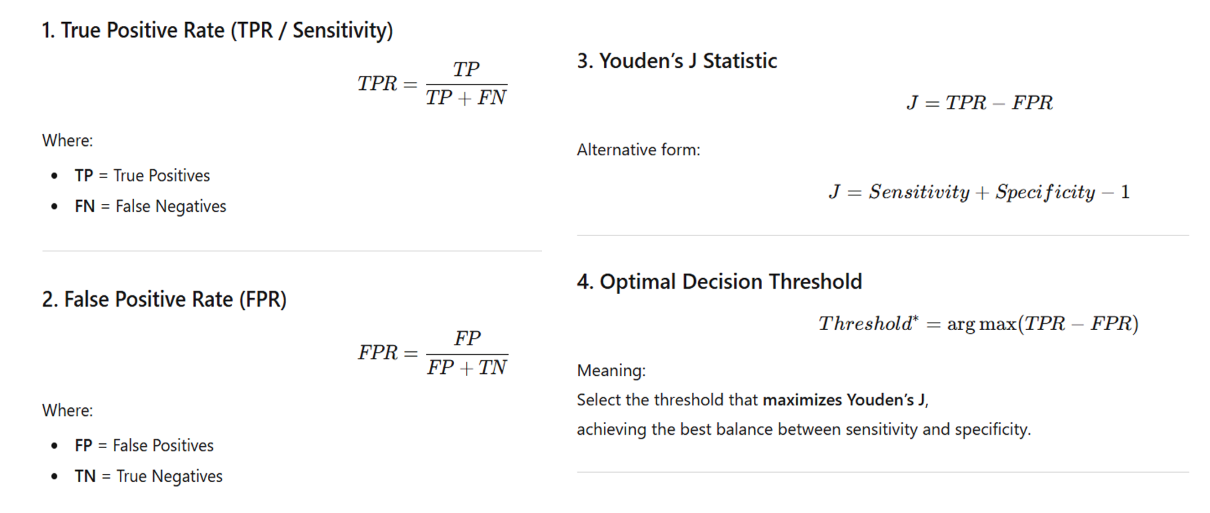

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Get predicted probabilities for the test set
y_pred_proba_test = logr.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

# Calculate Youden's J statistic for each threshold
youdens_j = tpr - fpr

# Find the optimal threshold that maximizes Youden's J
optimal_threshold_index = np.argmax(youdens_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"The optimal decision threshold based on Youden's J statistic is: {optimal_threshold:.4f}")

The optimal decision threshold based on Youden's J statistic is: 0.4185


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Apply optimal threshold
y_pred_opt = (y_prob >= optimal_threshold).astype(int)

print("Results for Optimal Threshold (0.4185)")
print(classification_report(y_test, y_pred_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_opt))

Results for Optimal Threshold (0.4185)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


This optimal threshold can be used to make predictions that might yield a better balance of true positives and false positives, depending on the specific requirements of the problem. For instance, in medical diagnoses, sometimes minimizing false negatives (high recall for the positive class) is prioritized even if it means a slight increase in false positives.



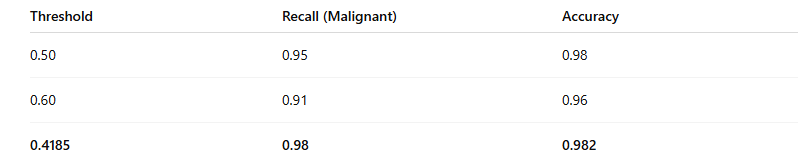

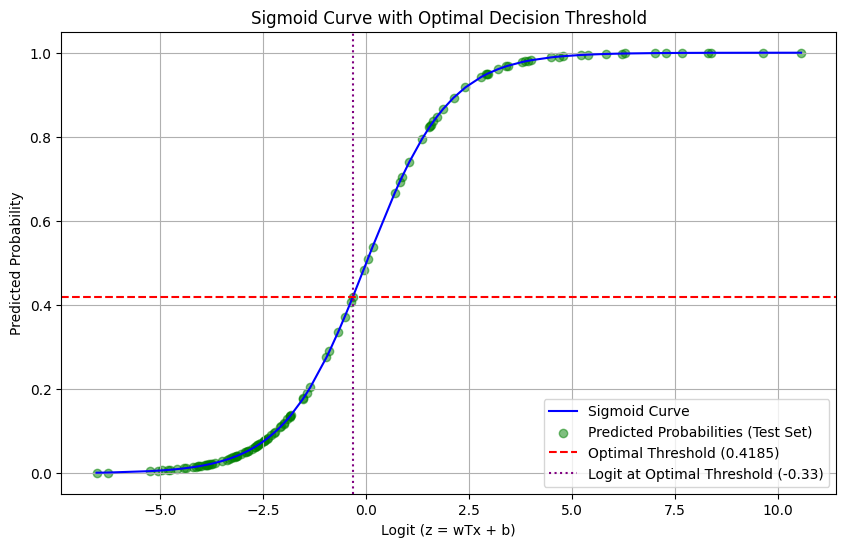

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the raw output (logits) from the decision function for the test set
z = logr.decision_function(X_test_scaled)

# Sort the logits for a smooth curve
z_sorted = np.sort(z)

# Calculate the sigmoid function for the sorted logits
sigmoid = 1 / (1 + np.exp(-z_sorted))

# Find the probability corresponding to the optimal threshold on the sigmoid curve
# This involves finding the logit value 'z_opt' where sigmoid(z_opt) = optimal_threshold
z_optimal = np.log(optimal_threshold / (1 - optimal_threshold))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z_sorted, sigmoid, color='blue', label='Sigmoid Curve')

# Plot the actual predicted probabilities for the test set as individual points
plt.scatter(z, y_pred_proba_test, color='green', alpha=0.5, label='Predicted Probabilities (Test Set)')

# Draw a horizontal line at the optimal threshold
plt.axhline(y=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')

# Draw a vertical line at the corresponding logit (z) value for the optimal threshold
plt.axvline(x=z_optimal, color='purple', linestyle=':', label=f'Logit at Optimal Threshold ({z_optimal:.2f})')

plt.title('Sigmoid Curve with Optimal Decision Threshold')
plt.xlabel('Logit (z = wTx + b)')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)
plt.show()

##TASK 10 : FINAL INSIGHTS



---


### 1️ . High Detection Performance

* Precision (Malignant): **0.98–1.00**
* Recall (Malignant): **0.95–0.98**
* F1-score: **~0.98**
* Model correctly detects majority of cancer cases with very low false alarms.

---

### 2 . Balanced Classification

* Precision and Recall both above **95%**
* F1-score close to **1.0**
* Indicates strong balance between minimizing:

  * False Positives
  * False Negatives

---

### 3️ . Strong Generalization

* Training Accuracy: **97%**
* Test Accuracy: **98%**
* Very small gap → No significant overfitting.

---

### 4️ . Reliable Clinical Support Potential

* Very low False Negatives (missed cancer cases)
* High overall accuracy
* Suitable as decision-support tool for early detection.

---


